In [3]:
import tensorflow as tf
import os



In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [5]:
data_dir='data'

In [6]:
os.listdir(data_dir)

['ai', 'real']

In [7]:
import cv2
import imghdr


C:\Users\Gokul\AppData\Local\Temp\ipykernel_22472\89219108.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
image_exts=['jpeg','jpg','bmp','png']

In [9]:
import numpy as np
from matplotlib import pyplot as plt


In [10]:
data= tf.keras.utils.image_dataset_from_directory('data')


Found 44287 files belonging to 2 classes.


In [11]:
data_iterator= data.as_numpy_iterator()


In [12]:
batch= data_iterator.next()


In [13]:
batch

(array([[[[230.      , 235.      , 231.      ],
          [230.      , 235.      , 231.      ],
          [230.      , 235.      , 231.      ],
          ...,
          [236.      , 236.      , 234.      ],
          [236.      , 236.      , 234.      ],
          [236.      , 236.      , 234.      ]],
 
         [[230.      , 235.      , 231.      ],
          [230.      , 235.      , 231.      ],
          [230.      , 234.59375 , 231.8125  ],
          ...,
          [236.      , 236.      , 234.      ],
          [236.      , 236.      , 234.      ],
          [236.      , 236.      , 234.      ]],
 
         [[230.      , 234.78711 , 231.42578 ],
          [230.      , 234.12299 , 232.75403 ],
          [230.      , 234.      , 233.17297 ],
          ...,
          [235.8736  , 236.1264  , 236.      ],
          [235.78711 , 236.21289 , 236.      ],
          [235.78711 , 236.21289 , 236.      ]],
 
         ...,
 
         [[205.78711 , 205.78711 , 207.78711 ],
          [204.943

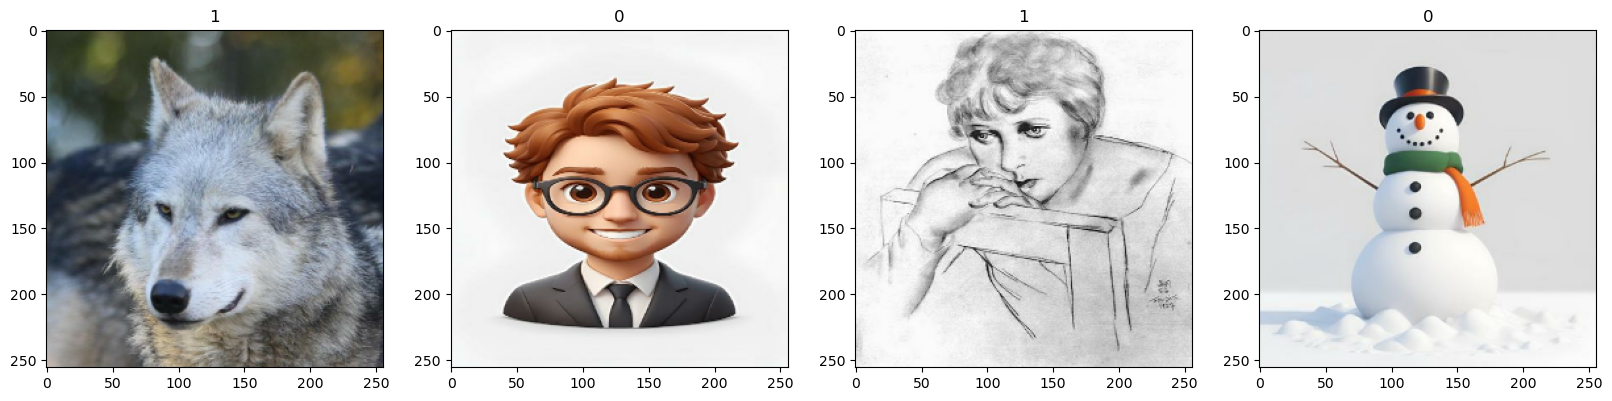

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#1-REAL
#0-AI


In [14]:
data = data.map(lambda x,y:(x/255,y))


In [15]:
data.as_numpy_iterator().next()

(array([[[[0.4960133 , 0.55875844, 0.6097388 ],
          [0.49803922, 0.56078434, 0.6117647 ],
          [0.5035539 , 0.566299  , 0.6172794 ],
          ...,
          [0.5702206 , 0.6525735 , 0.67218137],
          [0.5656365 , 0.64798945, 0.6675973 ],
          [0.56268   , 0.64503294, 0.6646408 ]],
 
         [[0.49803922, 0.56078434, 0.6117647 ],
          [0.500831  , 0.56357616, 0.61455655],
          [0.50551856, 0.56826365, 0.61924404],
          ...,
          [0.5735294 , 0.65588236, 0.6754902 ],
          [0.5685317 , 0.6508846 , 0.6704925 ],
          [0.5656365 , 0.64798945, 0.6675973 ]],
 
         [[0.50028723, 0.5630323 , 0.6140127 ],
          [0.503305  , 0.5660501 , 0.6170305 ],
          [0.5074755 , 0.5702206 , 0.621201  ],
          ...,
          [0.57900965, 0.6613626 , 0.68097043],
          [0.5735294 , 0.65588236, 0.6754902 ],
          [0.5702206 , 0.6525735 , 0.67218137]],
 
         ...,
 
         [[0.74669117, 0.7819853 , 0.8015931 ],
          [0.74865

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L2 

In [24]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3), kernel_regularizer=L2(0.001)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu', kernel_regularizer=L2(0.001)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu', kernel_regularizer=L2(0.001)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.5))  # Add dropout
model.add(Dense(1, activation='sigmoid'))

C:\Users\Gokul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
logdir='logs'

In [28]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [29]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callbacks, early_stopping])

Epoch 1/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 106s 108ms/step - accuracy: 0.7503 - loss: 0.6641 - val_accuracy: 0.8941 - val_loss: 0.3742
Epoch 2/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 105s 109ms/step - accuracy: 0.8774 - loss: 0.4020 - val_accuracy: 0.9102 - val_loss: 0.3421
Epoch 3/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 107s 110ms/step - accuracy: 0.8935 - loss: 0.3699 - val_accuracy: 0.9091 - val_loss: 0.3304
Epoch 4/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 109s 112ms/step - accuracy: 0.9002 - loss: 0.3465 - val_accuracy: 0.9007 - val_loss: 0.3474
Epoch 5/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 109s 112ms/step - accuracy: 0.9094 - loss: 0.3243 - val_accuracy: 0.9205 - val_loss: 0.2880
Epoch 6/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 115s 118ms/step - accuracy: 0.9158 - loss: 0.3079 - val_accuracy: 0.9150 - val_loss: 0.3185
Epoch 7/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 112s 116ms/step - accuracy: 0.9195 - loss: 0.2977 - val_accuracy: 0.9281 - val_loss: 0.2840
Epoch 8/10
968/968 ━━━━━━━━━━━━━━━━━━━━ 113s 117ms/step - accuracy: 0.9245 -

In [30]:
batch_size=32

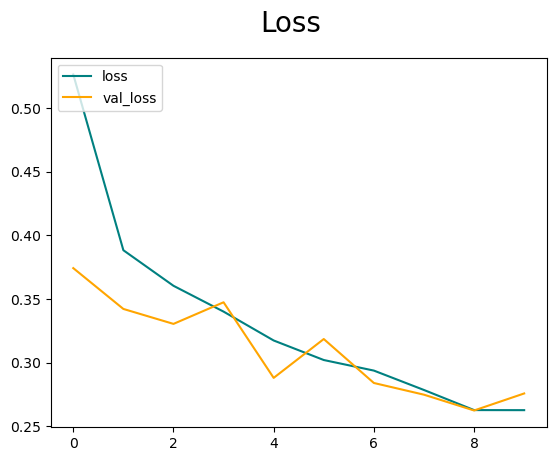

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

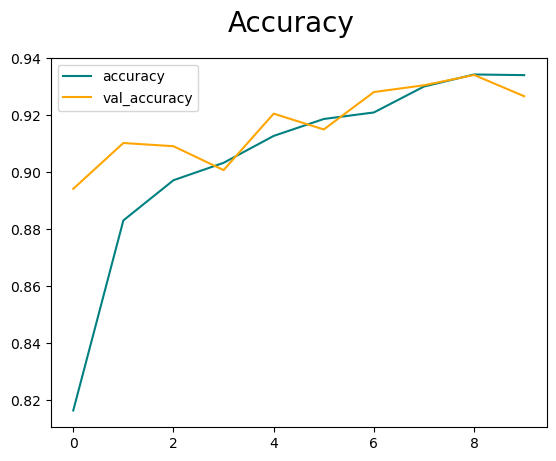

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [37]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9584389328956604, Recall:0.8890455961227417, Accuracy:0.92798912525177


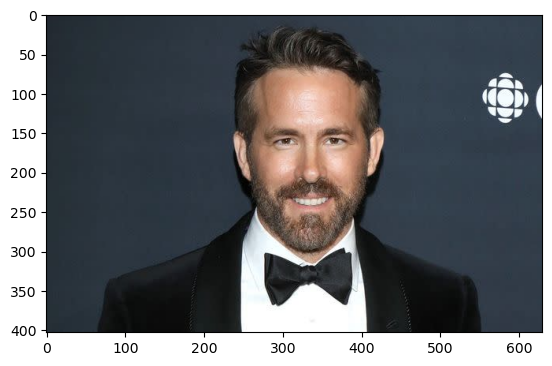

In [43]:
#TEST
import cv2
img=cv2.imread('l.jpg')
fixed=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(fixed)
plt.show()



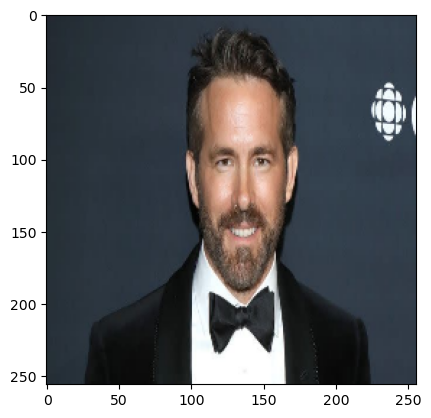

In [44]:
resize=tf.image.resize(fixed,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [25]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'model' is not defined

In [47]:
yhat

array([[0.10963702]], dtype=float32)

In [48]:
if yhat > 0.5: 
    print(f'its a real image')
else:
    print(f'its an ai generated image')

its an ai generated image


In [21]:
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('models','workingclassifier.h5'))

In [22]:
new_model = load_model('workingclassifier.h5')

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.02028913]], dtype=float32)